In [10]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
custom_sales = pd.read_csv(r'C:\Users\pooji\OneDrive\Attachments\Desktop\Priceoptima\custom_sales.csv')

In [12]:
custom_sales.head()
custom_sales.tail()  #dataset
custom_sales.shape
custom_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                300 non-null    object 
 1   Product ID          300 non-null    object 
 2   Units Sold          300 non-null    int64  
 3   Price               300 non-null    float64
 4   Revenue             300 non-null    float64
 5   Stock Level         300 non-null    int64  
 6   Restock Date        300 non-null    object 
 7   Warehouse/Store ID  300 non-null    int64  
 8   Competitor Price    300 non-null    float64
 9   Competitor Name     300 non-null    object 
 10  Product Name        300 non-null    object 
 11  Category            300 non-null    object 
 12  Cost Price          300 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 30.6+ KB


In [13]:
custom_sales.describe() #statistic 

,Units Sold,Price,Revenue,Stock Level,Warehouse/Store ID,Competitor Price,Cost Price
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000
mean,101.986667,101.785400,10288.840033,515.580000,24.806667,113.064133,76.83910
std,57.083227,58.251736,9039.460124,297.093811,13.560072,61.458805,41.83409
min,1.000000,7.110000,81.120000,0.000000,1.000000,6.060000,3.23000
25%,51.750000,50.842500,3111.980000,259.500000,13.000000,57.935000,45.30250
50%,101.000000,101.060000,7272.690000,541.000000,25.000000,115.770000,75.46000
75%,152.000000,152.560000,15676.607500,802.500000,36.000000,159.905000,112.24250
max,197.000000,199.940000,37875.840000,996.000000,49.000000,219.870000,149.68000


In [14]:
custom_sales.isnull().sum() #missing value

Date                  0
Product ID            0
Units Sold            0
Price                 0
Revenue               0
Stock Level           0
Restock Date          0
Warehouse/Store ID    0
Competitor Price      0
Competitor Name       0
Product Name          0
Category              0
Cost Price            0
dtype: int64

In [15]:
custom_sales.duplicated().sum()

np.int64(0)

In [16]:
custom_sales = custom_sales.drop_duplicates() #remove duplicate

In [17]:
custom_sales["Date"] = pd.to_datetime(custom_sales["Date"])


In [18]:
custom_sales["Revenue"] = custom_sales["Price"] * custom_sales["Units Sold"]

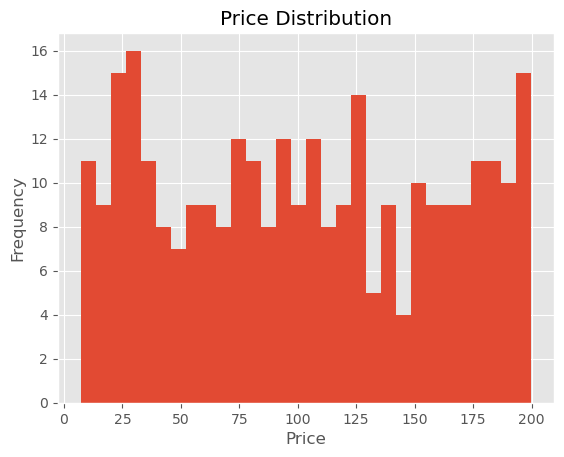

In [19]:
plt.hist(custom_sales["Price"], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")                            #Distribution of price
plt.ylabel("Frequency")
plt.show()


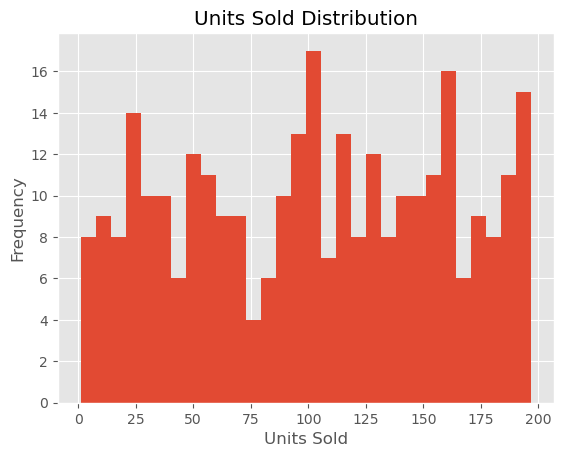

In [11]:
plt.hist(custom_sales["Units Sold"], bins=30)
plt.title("Units Sold Distribution")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")                 #units sold distribution 
plt.show()


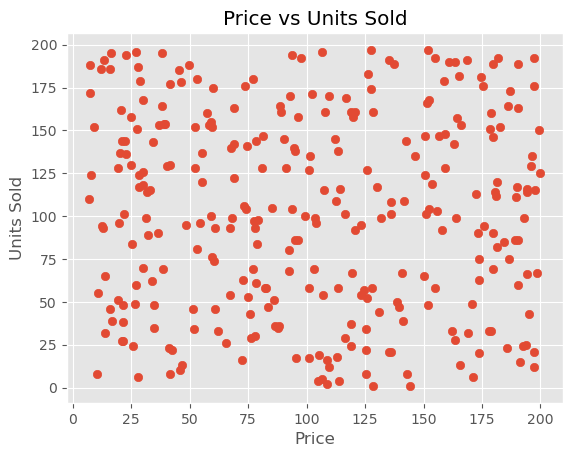

In [12]:
plt.scatter(custom_sales["Price"], custom_sales["Units Sold"])
plt.title("Price vs Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.show()


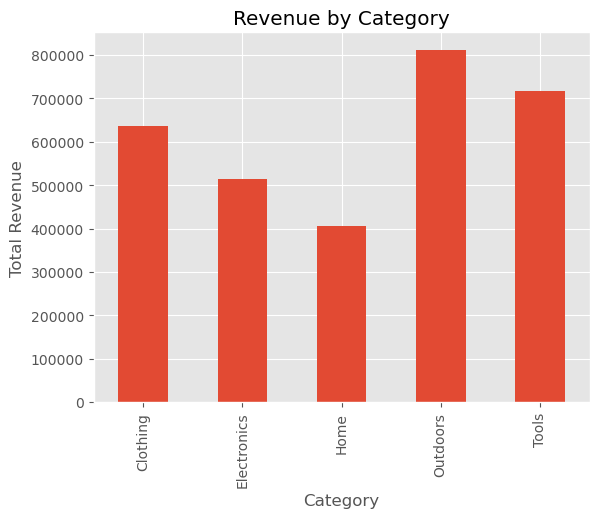

In [13]:
custom_sales.groupby("Category")["Revenue"].sum().plot(kind="bar")
plt.title("Revenue by Category")
plt.ylabel("Total Revenue")
plt.show()


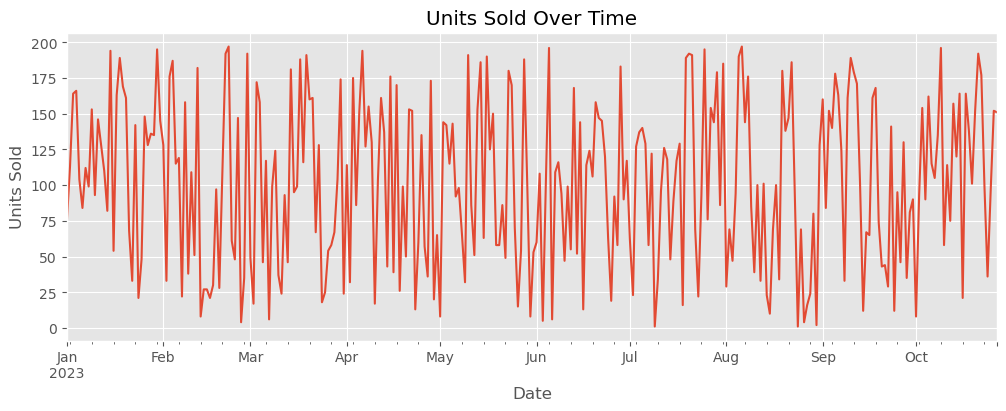

In [14]:
custom_sales.groupby("Date")["Units Sold"].sum().plot(figsize=(12,4))
plt.title("Units Sold Over Time")
plt.ylabel("Units Sold")
plt.show()


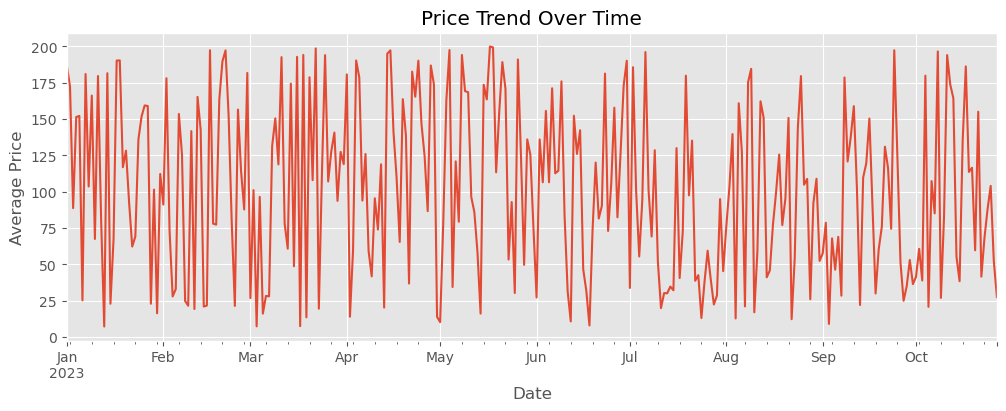

In [15]:
custom_sales.groupby("Date")["Price"].mean().plot(figsize=(12,4))
plt.title("Price Trend Over Time")
plt.ylabel("Average Price")
plt.show()


In [20]:
custom_sales["Rolling_Mean_7"] = custom_sales["Units Sold"].rolling(7).mean()
custom_sales["Rolling_Mean_30"] = custom_sales["Units Sold"].rolling(30).mean()


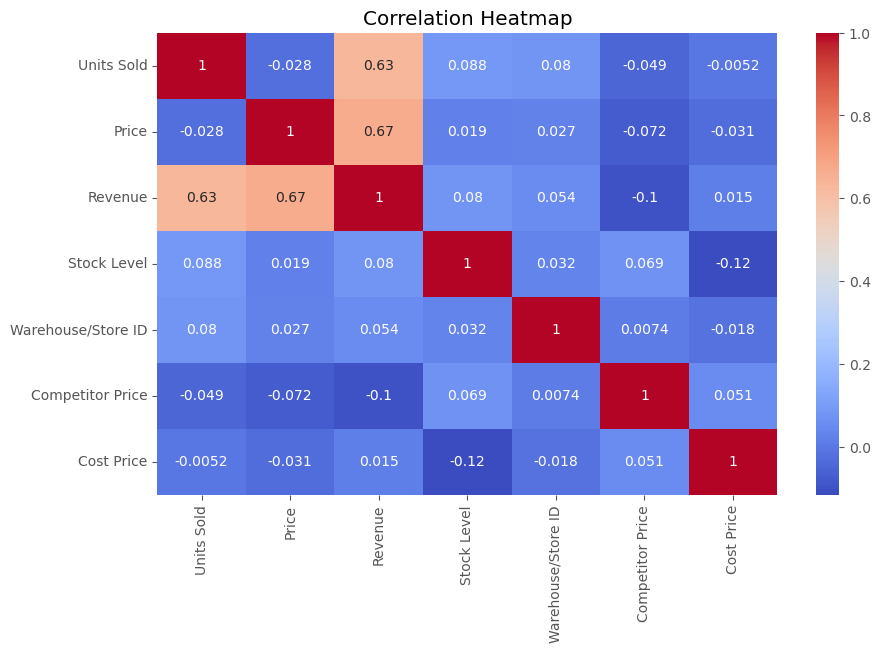

In [16]:
# Correlation Heatmap (FIXED)
plt.figure(figsize=(10,6))
numeric_df = custom_sales.select_dtypes(include=['int64', 'float64'])   # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [42]:
custom_sales["Date"] = pd.to_datetime(custom_sales["Date"])

In [43]:
custom_sales["Year"] = custom_sales["Date"].dt.year
custom_sales["Month"] = custom_sales["Date"].dt.month
custom_sales["Day"] = custom_sales["Date"].dt.day
custom_sales["DayOfWeek"] = custom_sales["Date"].dt.dayofweek
custom_sales["IsWeekend"] = custom_sales["DayOfWeek"].isin([5,6]).astype(int)


In [44]:
custom_sales["Price_Change_Pct"] = custom_sales["Price"].pct_change().fillna(0)


In [45]:
custom_sales["Discount"] = (custom_sales["Price"] < custom_sales["Price"].shift(1)).astype(int)


In [46]:
custom_sales["Lag_Units_1"] = custom_sales["Units Sold"].shift(1)
custom_sales["Lag_Units_7"] = custom_sales["Units Sold"].shift(7)


In [47]:
custom_sales["Rolling_Mean_7"] = custom_sales["Units Sold"].rolling(7).mean()
custom_sales["Rolling_Mean_30"] = custom_sales["Units Sold"].rolling(30).mean()


In [48]:
custom_sales["Inventory_Ratio"] = custom_sales["Units Sold"] / custom_sales["Stock Level"]


In [49]:
custom_sales["Low_Stock"] = (custom_sales["Stock Level"] < 20).astype(int)


In [50]:
custom_sales["Competitor_Diff"] = custom_sales["Price"] - custom_sales["Competitor Price"]
custom_sales["Competitor_Cheaper"] = (custom_sales["Competitor Price"] < custom_sales["Price"]).astype(int)


In [51]:
custom_sales["Profit"] = custom_sales["Revenue"] - (custom_sales["Cost Price"] * custom_sales["Units Sold"])
custom_sales["Margin_Pct"] = (custom_sales["Profit"] / custom_sales["Revenue"]) * 100


In [53]:
custom_sales.to_csv("processed_dataset.csv", index=False)


In [54]:
custom_sales.head()

,Date,Product ID,Units Sold,Price,Revenue,Stock Level,Restock Date,Warehouse/Store ID,Competitor Price,Competitor Name,...,Lag_Units_1,Lag_Units_7,Rolling_Mean_7,Rolling_Mean_30,Inventory_Ratio,Low_Stock,Competitor_Diff,Competitor_Cheaper,Profit,Margin_Pct
0,2023-01-01,P0103,75,186.50,13987.50,89,2023-02-04,15,17.98,Costco,...,NaN,NaN,NaN,NaN,0.842697,0,168.52,1,10026.75,71.683646
1,2023-01-02,P0180,113,172.39,19480.07,653,2023-01-29,38,58.13,Kroger,...,75.0,NaN,NaN,NaN,0.173047,0,114.26,1,5809.33,29.821915
2,2023-01-03,P0093,164,88.65,14538.60,319,2023-01-26,8,39.30,Kroger,...,113.0,NaN,NaN,NaN,0.514107,0,49.35,1,255.84,1.759729
3,2023-01-04,P0015,166,151.42,25135.72,549,2023-02-09,5,192.43,Costco,...,164.0,NaN,NaN,NaN,0.302368,0,-41.01,0,12127.96,48.249901
4,2023-01-05,P0107,104,152.14,15822.56,804,2023-02-08,48,52.13,Kroger,...,166.0,NaN,NaN,NaN,0.129353,0,100.01,1,11024.00,69.672670


In [55]:
custom_sales.tail()

,Date,Product ID,Units Sold,Price,Revenue,Stock Level,Restock Date,Warehouse/Store ID,Competitor Price,Competitor Name,...,Lag_Units_1,Lag_Units_7,Rolling_Mean_7,Rolling_Mean_30,Inventory_Ratio,Low_Stock,Competitor_Diff,Competitor_Cheaper,Profit,Margin_Pct
295,2023-10-23,P0054,99,68.12,6743.88,560,2023-11-21,41,76.60,BestBuy,...,177.0,21.0,146.142857,109.300000,0.176786,0,-8.48,0,4367.88,64.768056
296,2023-10-24,P0120,36,87.96,3166.56,326,2023-11-02,42,148.94,BestBuy,...,99.0,164.0,127.857143,110.100000,0.110429,0,-60.98,0,-1044.72,-32.992269
297,2023-10-25,P0161,96,103.98,9982.08,768,2023-11-09,14,218.74,BestBuy,...,36.0,138.0,121.857143,110.133333,0.125000,0,-114.76,0,5863.68,58.742066
298,2023-10-26,P0152,152,52.27,7945.04,735,2023-12-03,11,147.30,Kroger,...,96.0,101.0,129.142857,113.666667,0.206803,0,-95.03,0,-3608.48,-45.418022
299,2023-10-27,P0116,151,27.39,4135.89,140,2023-11-24,18,124.92,Amazon,...,152.0,152.0,129.000000,114.366667,1.078571,0,-97.53,0,-2627.40,-63.526835


In [56]:
custom_sales.columns


Index(['Date', 'Product ID', 'Units Sold', 'Price', 'Revenue', 'Stock Level',
       'Restock Date', 'Warehouse/Store ID', 'Competitor Price',
       'Competitor Name', 'Product Name', 'Category', 'Cost Price', 'Year',
       'Month', 'Day', 'DayOfWeek', 'IsWeekend', 'Price_Change_Pct',
       'Discount', 'Lag_Units_1', 'Lag_Units_7', 'Rolling_Mean_7',
       'Rolling_Mean_30', 'Inventory_Ratio', 'Low_Stock', 'Competitor_Diff',
       'Competitor_Cheaper', 'Profit', 'Margin_Pct'],
      dtype='object')

In [57]:
custom_sales.shape

(300, 30)

In [64]:
print("Feature engineering completed! Total columns:", len(custom_sales.columns))

Feature engineering completed! Total columns: 30
